In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [222]:
train = pd.read_csv('train_CC.csv')
test = pd.read_csv('test_CC.csv')

In [223]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [224]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [225]:
display(train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [226]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [227]:
train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

# Observations
- There are 3 unique values in Property_Area
- There are 7 object data types are need to be handle in pre processing 
- Null values exist in a lot of columns

In [228]:
train.groupby(["Credit_History"])["Loan_ID"].count() 

Credit_History
0.0     89
1.0    475
Name: Loan_ID, dtype: int64

In [229]:
train_ID = train['Loan_ID']
test_ID = test['Loan_ID']


train.drop("Loan_ID", axis = 1, inplace = True)
test.drop("Loan_ID", axis = 1, inplace = True)



In [230]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [231]:
train = train.dropna(subset = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"])
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [232]:
train["LoanAmount"] = train["LoanAmount"].fillna(train["LoanAmount"].mean())
train["Loan_Amount_Term"] = train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mean())
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

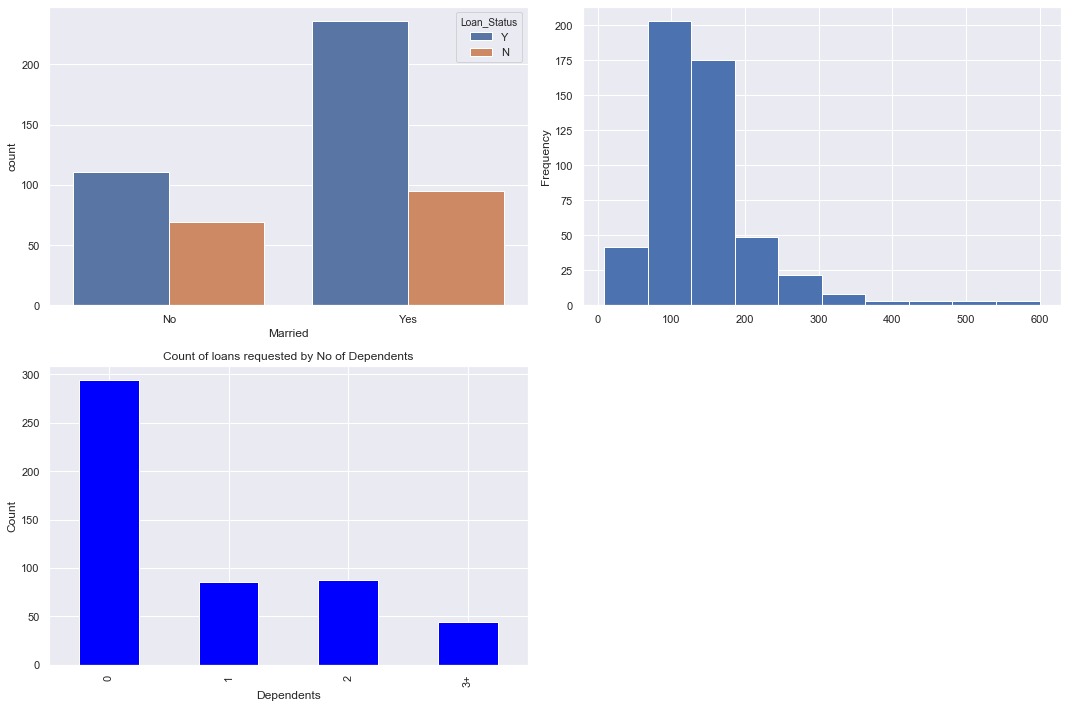

In [233]:
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1)

# Count plot
fig1 = fig.add_subplot(221); sns.countplot(x=train["Married"], hue = train["Loan_Status"], data = train)

# LoanAmount distribution Histogram
fig2 = fig.add_subplot(222); 
train["LoanAmount"].plot.hist(train["LoanAmount"])

# Count of loans requested by No of Dependents
fig3 = fig.add_subplot(223); 
train.groupby("Dependents")["Loan_Status"].count().plot.bar(color = "blue")
fig3.set_ylabel('Count')
fig3.set_title("Count of loans requested by No of Dependents")



plt.tight_layout(); plt.show()

# Outliers Detection

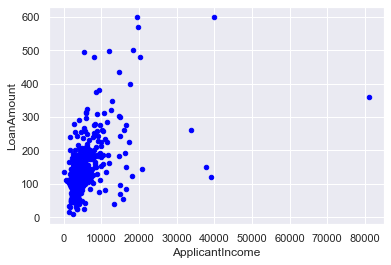

In [234]:
train.plot.scatter("ApplicantIncome", "LoanAmount", color = "blue")
plt.show()

# Observations
- Most of the loans are around the 100 to < 200 range.
- Loan count is more in case when the person is married.
- Count of loan is more in case of 0 dependents.
- There is a presence of outliers in above case.

In [235]:
train.groupby(["Gender"])["Loan_Status"].count()

Gender
Female     91
Male      420
Name: Loan_Status, dtype: int64

In [236]:
train.groupby(["Married"])["Loan_Status"].count()

Married
No     180
Yes    331
Name: Loan_Status, dtype: int64

In [237]:
train.groupby(["Dependents"])["Loan_Status"].count()

Dependents
0     294
1      85
2      88
3+     44
Name: Loan_Status, dtype: int64

In [238]:
train.groupby(["Education"])["Loan_Status"].count()

Education
Graduate        401
Not Graduate    110
Name: Loan_Status, dtype: int64

In [239]:
train.groupby(["Self_Employed"])["Loan_Status"].count()

Self_Employed
No     441
Yes     70
Name: Loan_Status, dtype: int64

In [240]:
train.groupby(["Loan_Status"])["Loan_Status"].count()

Loan_Status
N    164
Y    347
Name: Loan_Status, dtype: int64

In [241]:
train.groupby(["Property_Area"])["Loan_Status"].count()

Property_Area
Rural        149
Semiurban    197
Urban        165
Name: Loan_Status, dtype: int64

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 12 columns):
Gender               511 non-null object
Married              511 non-null object
Dependents           511 non-null object
Education            511 non-null object
Self_Employed        511 non-null object
ApplicantIncome      511 non-null int64
CoapplicantIncome    511 non-null float64
LoanAmount           511 non-null float64
Loan_Amount_Term     511 non-null float64
Credit_History       511 non-null float64
Property_Area        511 non-null object
Loan_Status          511 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 71.9+ KB


In [243]:
train["Loan_Status"] = train["Loan_Status"].replace(["N","Y"], [0, 1])

In [244]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,144.136179,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


# One hot encoder

In [245]:
train = pd.get_dummies(train)
print(train.shape)

(511, 21)


In [246]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,144.136179,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


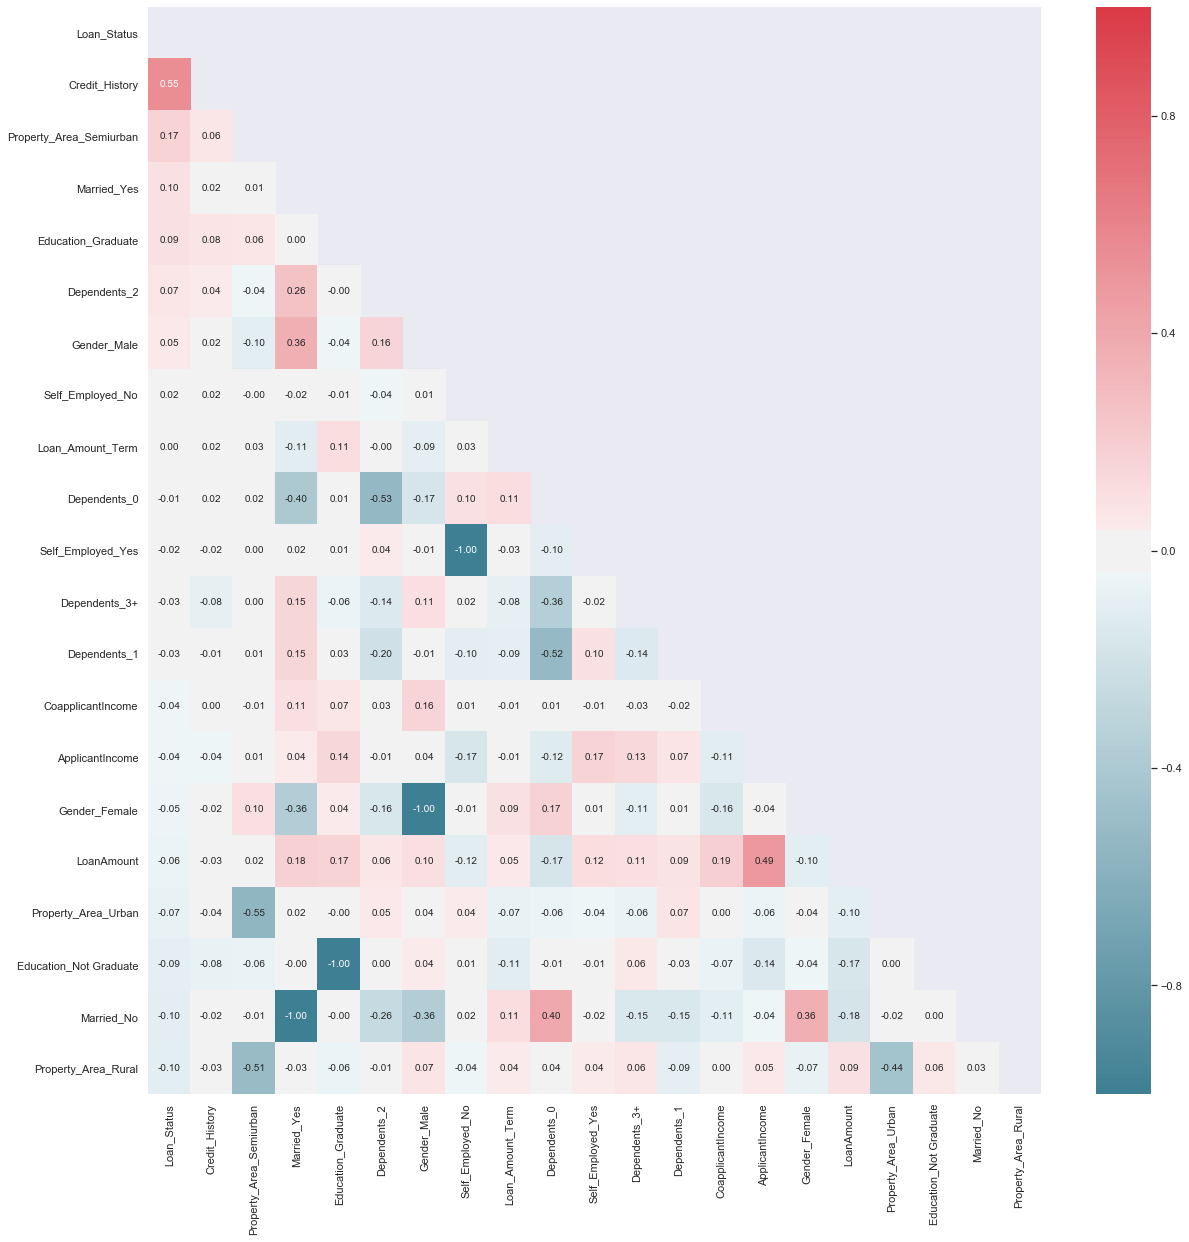

In [261]:
corr = train[train.Loan_Status>-50].corr()
top_corr_cols = corr[abs((corr.Loan_Status)>=-50)].Loan_Status.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1)
plt.show()
del corr, dropSelf, top_corr
%matplotlib inline

In [265]:
corr_wrt_Loan_Status=train[train.columns[1:]].corr()['Loan_Status'][:]
corr_wrt_Loan_Status_df = pd.DataFrame(corr_wrt_Loan_Status)
corr_wrt_Loan_Status_df.sort_values(by=['Loan_Status'], inplace=True, ascending=False)
corr_wrt_Loan_Status_df.head(20)

,Loan_Status
Loan_Status,1.000000
Credit_History,0.545934
Property_Area_Semiurban,0.165578
Married_Yes,0.098560
Education_Graduate,0.088699
Dependents_2,0.069309
Gender_Male,0.052533
Self_Employed_No,0.018705
Loan_Amount_Term,0.004052
Dependents_0,-0.013941


# Machine Learning

In [272]:
y = train['Loan_Status'].values

X = train.drop(columns = ['Loan_Status'])

In [273]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [275]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,144.136179,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


# LogisticRegression

In [292]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Sequence for splitting


logreg = LogisticRegression()
logreg.fit(X_train, y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score


print(accuracy_score(y_pred , y_test))

0.8051948051948052


In [295]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[26, 29],
       [ 1, 98]], dtype=int64)

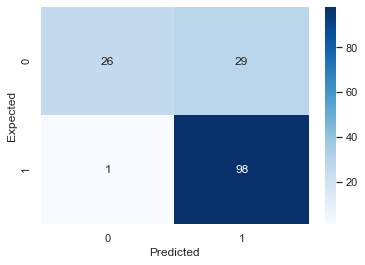

In [296]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63        55
           1       0.77      0.99      0.87        99

    accuracy                           0.81       154
   macro avg       0.87      0.73      0.75       154
weighted avg       0.84      0.81      0.78       154



# Scores
- Accuracy Score  = 81%
- Precision Score = 77%
- recall Score    = 99%
- f1 Score        = 87%


# DecisionTreeClassifier

In [298]:
from sklearn.tree import DecisionTreeClassifier

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [300]:
y_pred = dte.predict(X_test)

from sklearn.metrics import accuracy_score


print(accuracy_score(y_pred , y_test))

0.7597402597402597


In [291]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[30, 25],
       [14, 85]], dtype=int64)

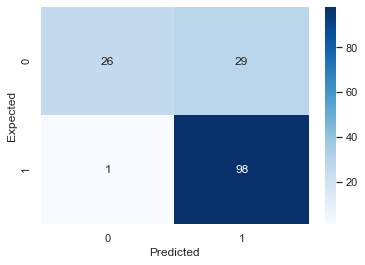

In [301]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [302]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        55
           1       0.80      0.84      0.82        99

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



# Scores
- Accuracy Score  = 76%
- Precision Score = 80%
- recall Score    = 84%
- f1 Score        = 82%


# Random Forest Classifier

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [314]:
y_pred = rfc.predict(X_test)

In [315]:
print(accuracy_score(y_pred , y_test))

0.7792207792207793


In [316]:
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[27, 28],
       [ 6, 93]], dtype=int64)

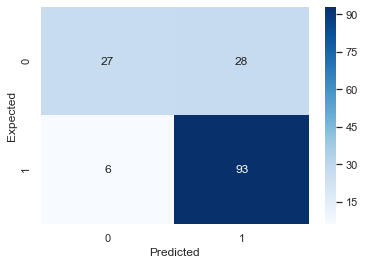

In [317]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [318]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.49      0.61        55
           1       0.77      0.94      0.85        99

    accuracy                           0.78       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.79      0.78      0.76       154



# Scores
- Accuracy Score  = 78%
- Precision Score = 77%
- recall Score    = 94%
- f1 Score        = 85%


# XGBoostClassifier

In [319]:
import xgboost as xgb

In [320]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
xgb = xgb.XGBClassifier()
xgb.fit( X_train, y_train )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [321]:
y_pred = xgb.predict(X_test)

In [322]:
print(accuracy_score(y_pred , y_test))

0.7857142857142857


In [323]:
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[31, 24],
       [ 9, 90]], dtype=int64)

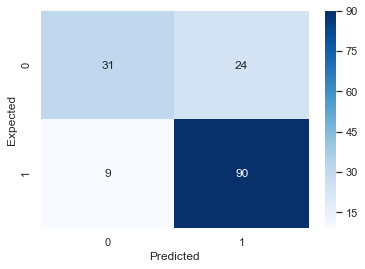

In [324]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [326]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65        55
           1       0.79      0.91      0.85        99

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# Scores
- Accuracy Score  = 79%
- Precision Score = 79%
- recall Score    = 91%
- f1 Score        = 85%


##### With these scores we can conclude that Logistic regression is best in this case among the above used machine learning techniques.